In [1]:
import numpy as np
import matplotlib.pyplot as plt

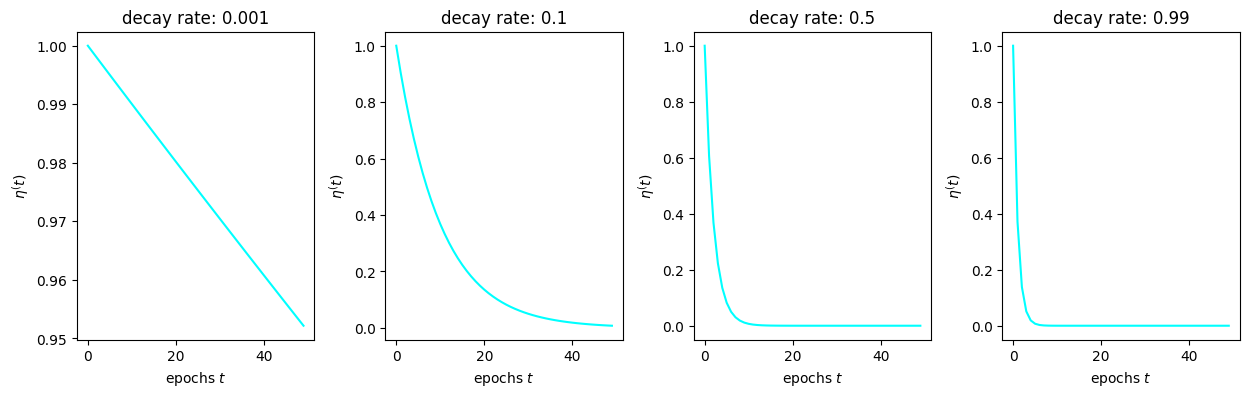

In [2]:
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

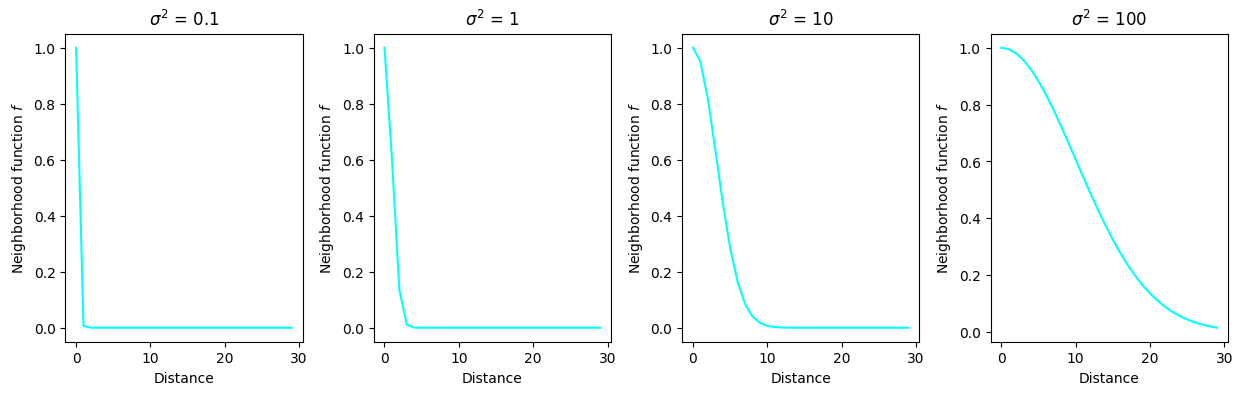

In [3]:
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [4]:
from som  import SoM

In [5]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 300000
# Initialize the training data
rand = np.random.RandomState(0)
train_data = rand.randint(0, 255, (n_x, 3))

Dimensiones del SOM calculadas a partir del PCA: m = 10, n = 10
SOM inicializado con PCA.


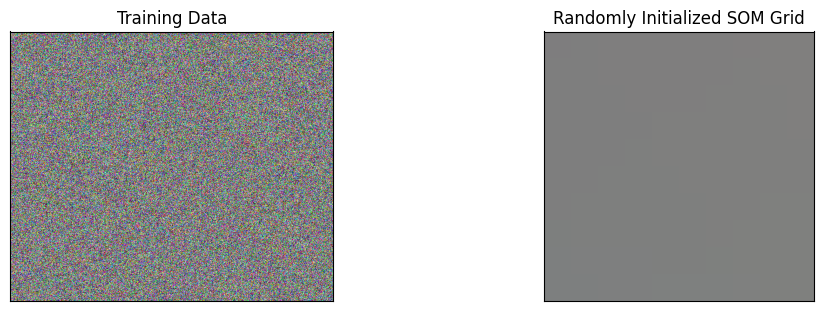

In [6]:


# Initialize the SOM randomly
som = SoM(m, n, method="pca",input_dim=3,data=train_data, min_val=0,max_val=255)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(500, 600, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(som.som_map.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

Entrenando SOM: 100%|██████████████████████| 10/10 [01:34<00:00,  9.42s/it, lr=0.0407, radius=0.638]


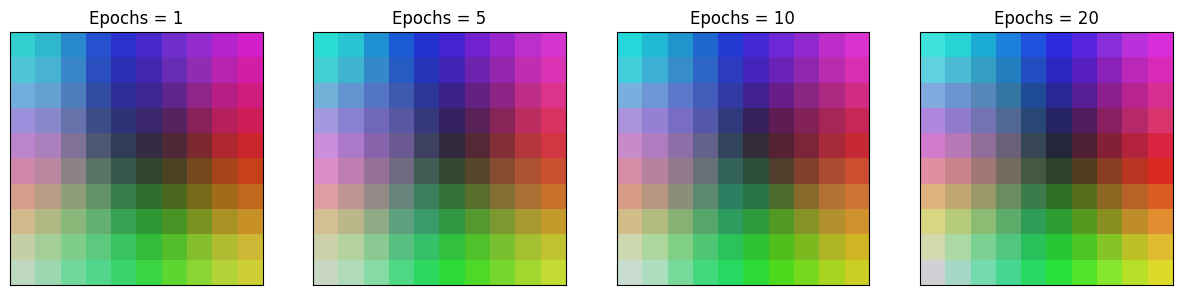

In [7]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4,5,10], range(0,4)):
    total_epochs += epochs
    map = som.train(train_data, epochs=epochs)
    ax[i].imshow(map.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

In [8]:
# Initialize the SOM randomly
som = SoM(m, n, method="pca",input_dim=3,data=train_data, min_val=0,max_val=255)

Dimensiones del SOM calculadas a partir del PCA: m = 10, n = 10
SOM inicializado con PCA.


Entrenando SOM: 100%|██████████████████████| 10/10 [01:27<00:00,  8.79s/it, lr=0.0407, radius=0.638]


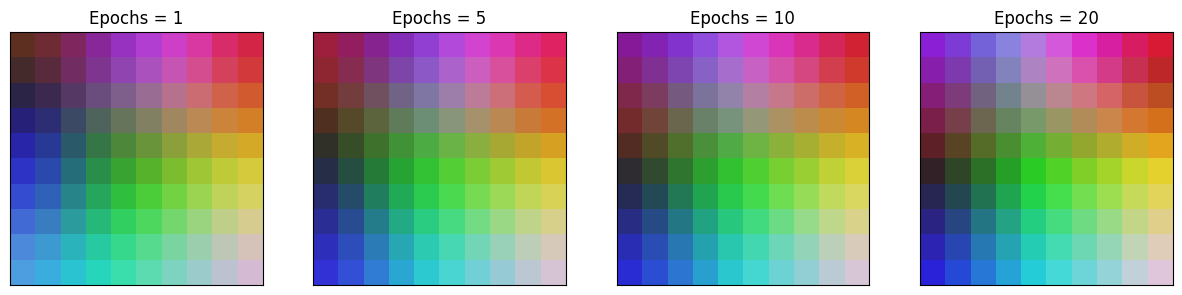

In [9]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4,5,10], range(0,4)):
    total_epochs += epochs
    map = som.train(train_data, epochs=epochs,update='batch',batch_size=10000)
    ax[i].imshow(map.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

Entrenando SOM: 100%|██████████████████████████| 5/5 [00:45<00:00,  9.12s/it, lr=0.664, radius=2.59]


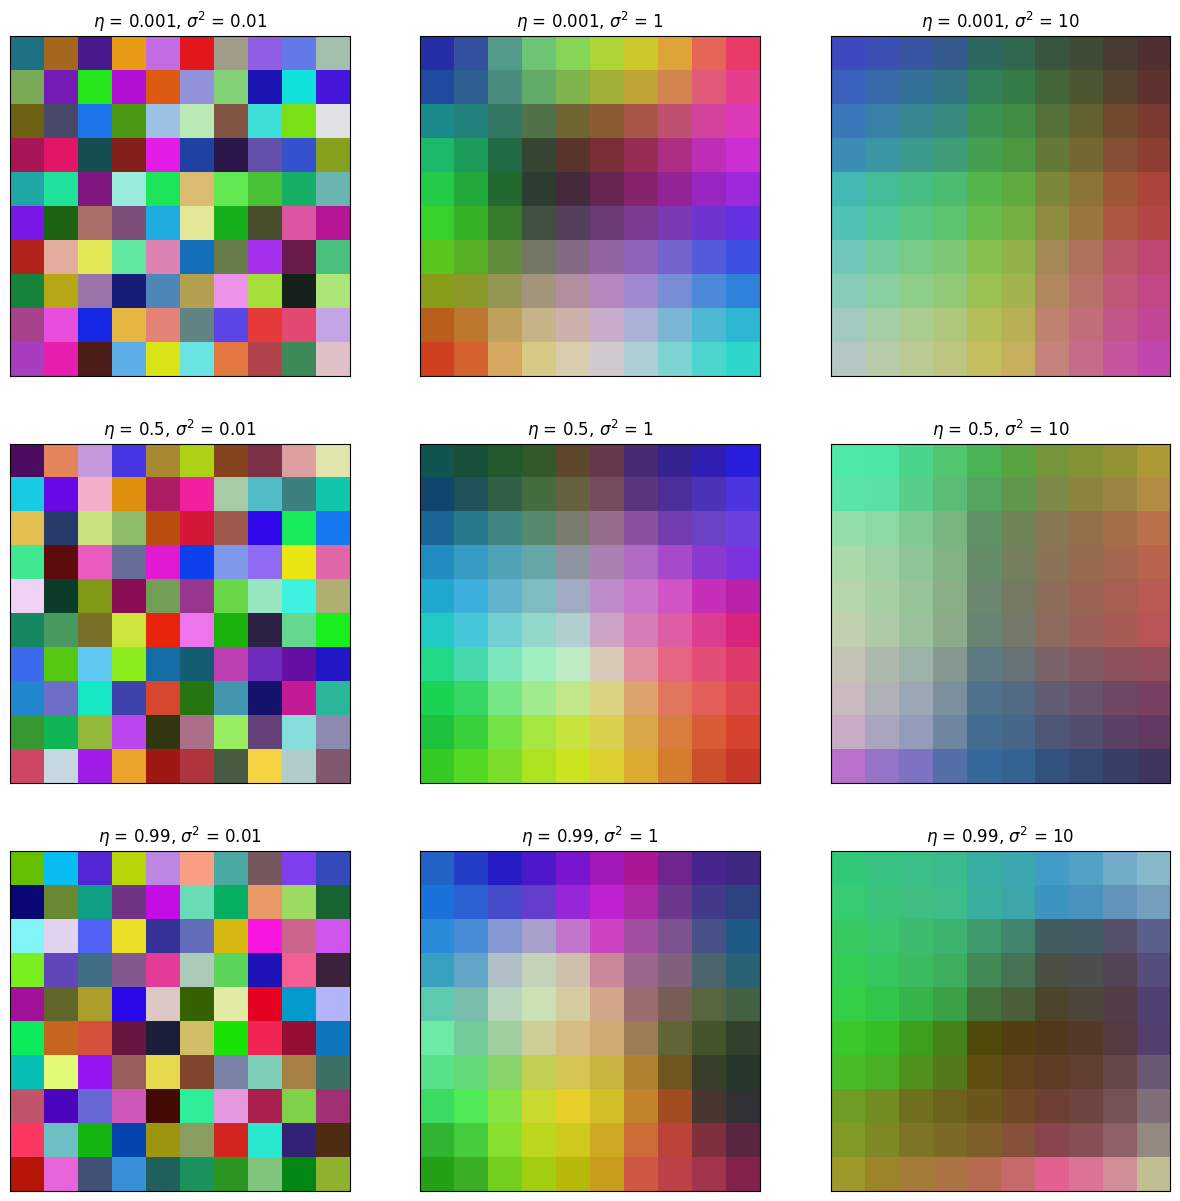

In [11]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        som.som_map = som.rand.randint(0, 255, (m, n, 3)).astype(float)        
        res = som.train(train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(res.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))